In [132]:
import torch
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import FashionMNIST

In [133]:
train_dataset = FashionMNIST(root= 'data/', download=True, train=True,transform=ToTensor())
test_dataset = FashionMNIST(root='data/', train=False,transform=ToTensor())
len(train_dataset),len(test_dataset)

(60000, 10000)

In [134]:
batch_size = 60

In [135]:
# dataloader
train_loader = DataLoader(train_dataset,batch_size, shuffle=True,num_workers=2,pin_memory=True)
test_loader = DataLoader(test_dataset,batch_size, pin_memory=True)

In [136]:
class FashionNeural(nn.Module):
    def __init__(self,in_size,hidden_size,num_classes):
        super().__init__()
        self.linear1 = nn.Linear(in_size,hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size,num_classes)

    def forward(self,x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [137]:
input_size = 28*28
hidden_size = 32
num_classes = 10

In [138]:
model = FashionNeural(input_size,hidden_size=hidden_size,num_classes=num_classes)
model

FashionNeural(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [139]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [140]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [141]:
num_epochs = 5

for epochs in range(num_epochs):

    for images, labels in train_loader:
        
        images = images.reshape(-1,28*28)
        out = model(images)
        loss = F.cross_entropy(out,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if(epochs+1)%1== 0:
        print(f'Epochs:[{epochs}]. Loss:{loss.item()}')
        

Epochs:[0]. Loss:0.662214457988739
Epochs:[1]. Loss:0.3435382544994354
Epochs:[2]. Loss:0.3292246460914612
Epochs:[3]. Loss:0.4294424057006836
Epochs:[4]. Loss:0.4036397635936737


In [142]:
with torch.no_grad():
    n_samples = 0
    n_correct = 0
    for images,labels in test_loader:
        images = images.reshape(-1,28*28)
        outputs = model(images)

        _, preds = torch.max(outputs, 1)

        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
    
acc = (n_correct/n_samples)*100
print(f'Accuracy: {acc}')

Accuracy: 84.31


In [147]:
def predict(img,model):
    xb = img.unsqueeze(0)
    xb = xb.reshape(-1,784)
    yb = model(xb)
    _,predicts = torch.max(yb, dim=1)
    return predicts[0].item()

Label: T-shirt/top , Predicted: Dress


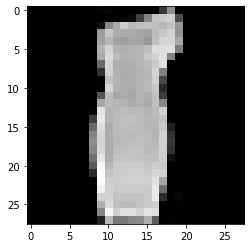

In [149]:
img, label = test_dataset[323]
plt.imshow(img[0], cmap='gray')
print('Label:', train_dataset.classes[label], ', Predicted:', train_dataset.classes[predict(img, model)])